**hotel_booking_graph**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("hotel_booking.csv")

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df[df["children"].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-01,Craig Campos,CraigCampos@mail.com,820-622-9854,************7219
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,Transient-Party,12.0,0,1,Canceled,2015-08-04,David Murphy,David.Murphy94@yahoo.com,231-438-6733,************8925
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,Transient-Party,18.0,0,2,Canceled,2015-08-04,Frank Burton,Frank.Burton@comcast.net,395-084-3601,************6190
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,Transient-Party,76.5,0,1,Canceled,2015-08-09,Jerry Roberts,JRoberts@hotmail.com,979-355-3554,************5648


In [ ]:
# Ada missing value di variabel children, maka akan dilakukan imputasi dengan nilai 0
df = df.fillna(0)

In [ ]:
# Karena sudah tidak ada nilai kosong pada adults, babies, dan children,
# bisa langsung buat kolom baru (jumlah pengunjung)

new_col_index = df.columns.get_loc("meal")
df.insert(new_col_index, "total_customer", np.nan)

In [ ]:
df["total_customer"] = df["adults"] + (df["babies"]) + (df["children"])


In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
# Membuat kolom baru dengan variable "date" dengan menggabungkan tahun, bulan dan tanggal serta mengubahnya menjadi type data time series

# Konversi kolom bulan menjadi angka
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: pd.to_datetime(x, format='%B').month)

# Menggabungkan kolom tahun, bulan, dan tanggal menjadi satu kolom datetime
df['date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

# Mengatur kolom 'date' sebagai indeks
df.set_index('date', inplace=True)

# Menghapus kolom tahun, bulan, dan tanggal jika tidak diperlukan lagi
df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

df.sort_index(inplace=True)

# Tampilkan DataFrame
print(df)


                   hotel  is_canceled  lead_time  arrival_date_week_number  \
date                                                                         
2015-07-01  Resort Hotel            0        342                        27   
2015-07-01    City Hotel            0        257                        27   
2015-07-01    City Hotel            0        257                        27   
2015-07-01    City Hotel            0        257                        27   
2015-07-01    City Hotel            0        257                        27   
...                  ...          ...        ...                       ...   
2017-08-31  Resort Hotel            0        108                        35   
2017-08-31  Resort Hotel            0        194                        35   
2017-08-31  Resort Hotel            1         17                        35   
2017-08-31  Resort Hotel            0        191                        35   
2017-08-31    City Hotel            0          3                

**Visualisasi data day_in_waiting_list (berdasarkan time series)**

Akan dilakukan visualisasi variable day_in_waiting_list dalam rentang waktu tertentu (sesuai pada data) untuk melihat grafik guna menganalisis kenaikan/penurunan yang terjadi. Tahap yang dilakukan:


*   Menjumlahkan data day_in_waiting_list setiap minggunya serta memisahkan antara Resort Hotel dan City Hotel
*   Membuat visualisasi dalam bentuk line chart untuk melihat apa yang terjadi pada data day_in_waiting_list berdasarkan variabel baru yang telah dibuat pada langkah sebelumnya.



            hotel  arrival_date_year  arrival_date_week_number  visitor_count
0      City Hotel               2015                        36              8
1      City Hotel               2015                        37              8
2      City Hotel               2015                        39             36
3      City Hotel               2015                        40             56
4      City Hotel               2015                        41             88
..            ...                ...                       ...            ...
112  Resort Hotel               2017                        19              3
113  Resort Hotel               2017                        21              3
114  Resort Hotel               2017                        22              1
115  Resort Hotel               2017                        23              2
116  Resort Hotel               2017                        28              2

[117 rows x 4 columns]


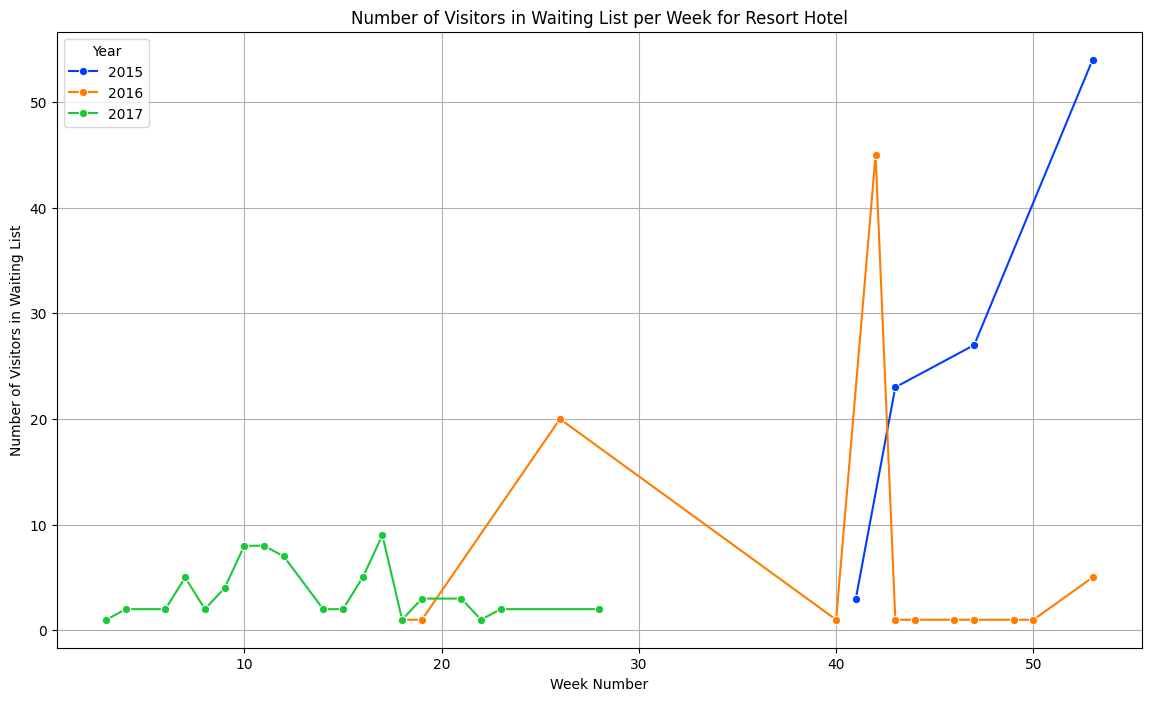

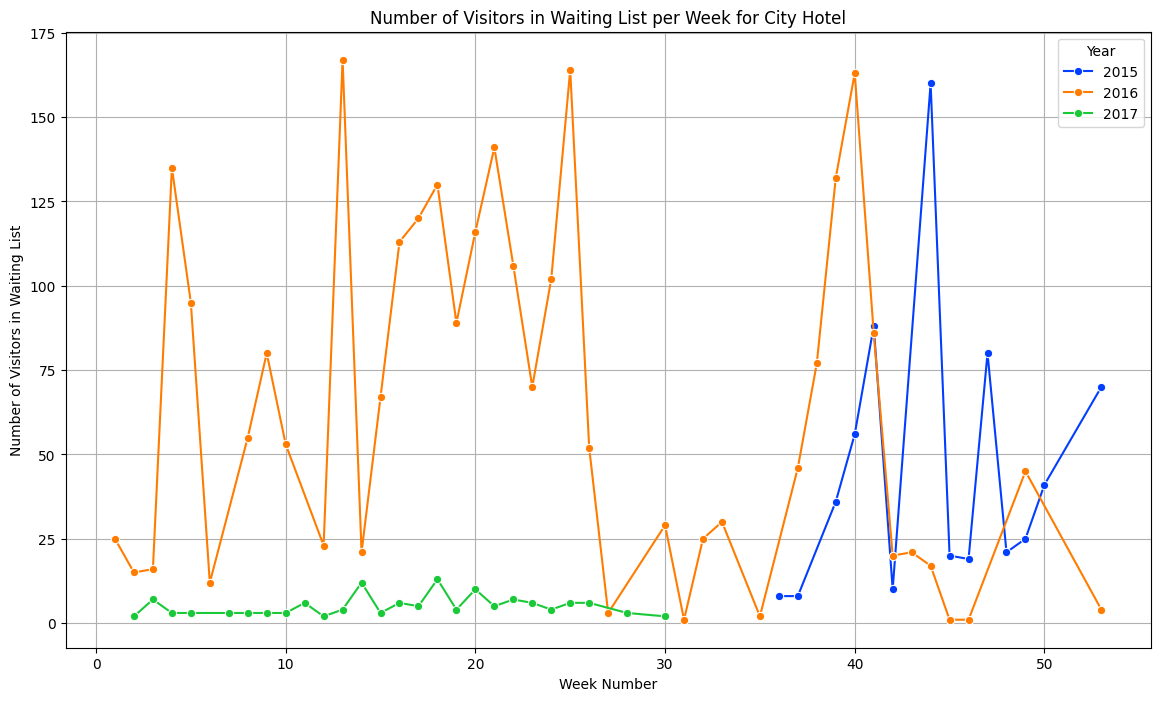

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
df = pd.read_csv('hotel_booking.csv')

# Membuat kolom baru 'waiting_list_count' untuk menghitung pengunjung dalam daftar tunggu
df['waiting_list_count'] = df['days_in_waiting_list'].apply(lambda x: 1 if x > 0 else 0)

# Mengelompokkan data berdasarkan 'hotel', 'arrival_date_year', dan 'arrival_date_week_number', lalu menghitung jumlah baris yang memenuhi syarat
grouped_df = df[df['waiting_list_count'] > 0].groupby(['hotel', 'arrival_date_year', 'arrival_date_week_number']).size().reset_index(name='visitor_count')

# Menampilkan DataFrame yang telah dikelompokkan
print(grouped_df)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_df[grouped_df['hotel'] == 'Resort Hotel'], x='arrival_date_week_number', y='visitor_count', hue='arrival_date_year', palette='bright', marker='o')
plt.title('Number of Visitors in Waiting List per Week for Resort Hotel')
plt.xlabel('Week Number')
plt.ylabel('Number of Visitors in Waiting List')
plt.legend(title='Year')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_df[grouped_df['hotel'] == 'City Hotel'], x='arrival_date_week_number', y='visitor_count', hue='arrival_date_year', palette='bright', marker='o')
plt.title('Number of Visitors in Waiting List per Week for City Hotel')
plt.xlabel('Week Number')
plt.ylabel('Number of Visitors in Waiting List')
plt.legend(title='Year')
plt.grid(True)
plt.show()


Akan dibuat visualisasi mengenai jumlah pengunjung dari variabel yang sudah dibuat, yaitu "total customer" tiap minggu

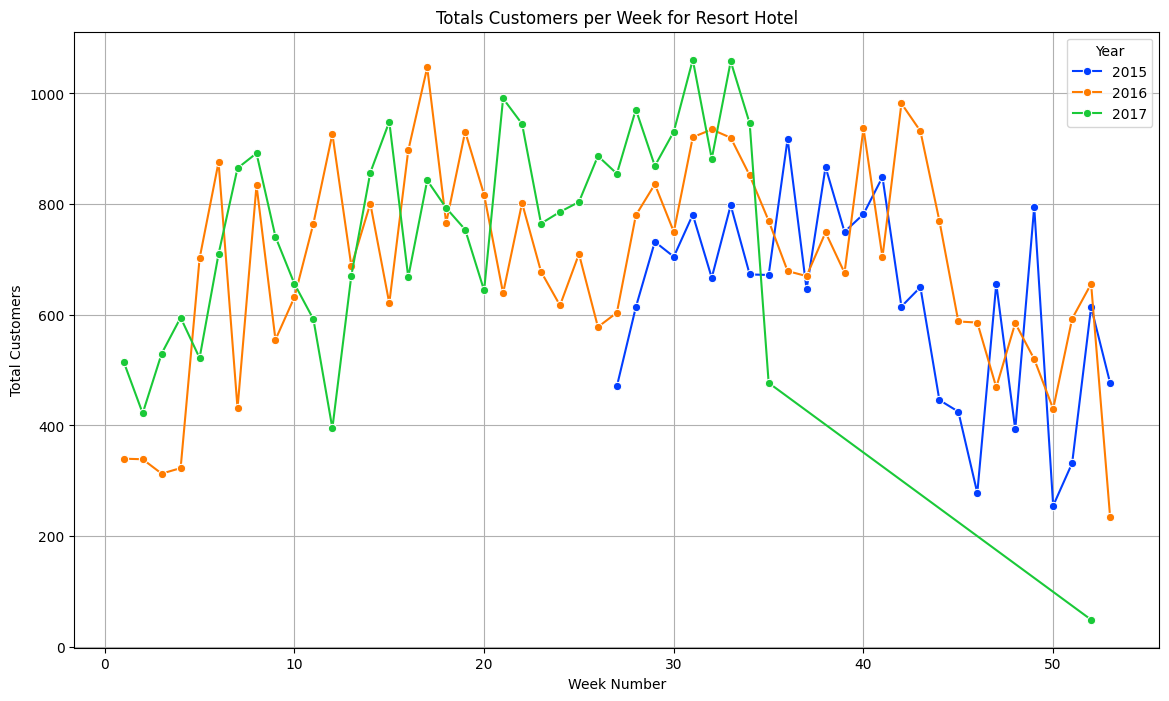

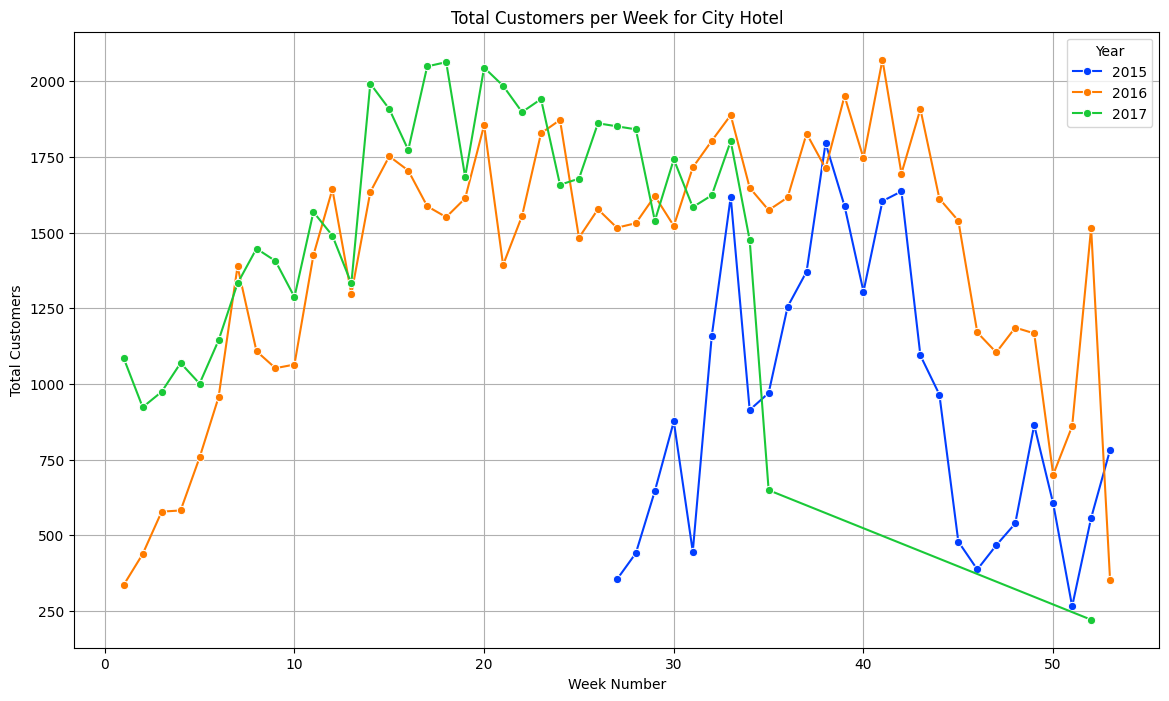

<Figure size 640x480 with 0 Axes>

In [ ]:
# Filter data resort hotel agar terpisah dengan city hotel
resort_hotel_df = df[df['hotel'] == 'Resort Hotel'].copy()

resort_hotel_df = resort_hotel_df[['hotel', 'arrival_date_year', 'arrival_date_week_number', 'total_customer']]

resort_hotel_agg = resort_hotel_df.groupby(['arrival_date_year', 'arrival_date_week_number'])['total_customer'].sum().reset_index(name='total_customers')

# Plotting for Resort Hotel
plt.figure(figsize=(14, 8))
sns.lineplot(data=resort_hotel_agg, x='arrival_date_week_number', y='total_customers', hue='arrival_date_year', palette='bright', marker='o')
plt.title('Totals Customers per Week for Resort Hotel')
plt.xlabel('Week Number')
plt.ylabel('Total Customers')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Filter data City Hotel biar kepisah sama resort hotel
city_hotel_df = df[df['hotel'] == 'City Hotel'].copy()

city_hotel_df["total_customer"] = city_hotel_df["adults"] + city_hotel_df["babies"] + city_hotel_df["children"]

city_hotel_df = city_hotel_df[['hotel', 'arrival_date_year', 'arrival_date_week_number', 'total_customer']]

city_hotel_agg = city_hotel_df.groupby(['arrival_date_year', 'arrival_date_week_number'])['total_customer'].sum().reset_index(name='total_customers')


# Plotting for City Hotel
plt.figure(figsize=(14, 8))
sns.lineplot(data=city_hotel_agg, x='arrival_date_week_number', y='total_customers', hue='arrival_date_year', palette='bright', marker='o')
plt.title('Total Customers per Week for City Hotel')
plt.xlabel('Week Number')
plt.ylabel('Total Customers')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [ ]:
# Fungsi untuk menghitung jumlah kamar
def calculate_room_counts(data, group_by_columns):
    return data.groupby(group_by_columns).size().reset_index(name='counts')

# Menghitung jumlah kamar untuk Resort Hotel
resort_counts = calculate_room_counts(resort_hotel_data, ['reserved_room_type', 'stays_in_weekend_nights'])

# Menghitung jumlah kamar untuk City Hotel
city_counts = calculate_room_counts(city_hotel_data, ['reserved_room_type', 'stays_in_weekend_nights'])


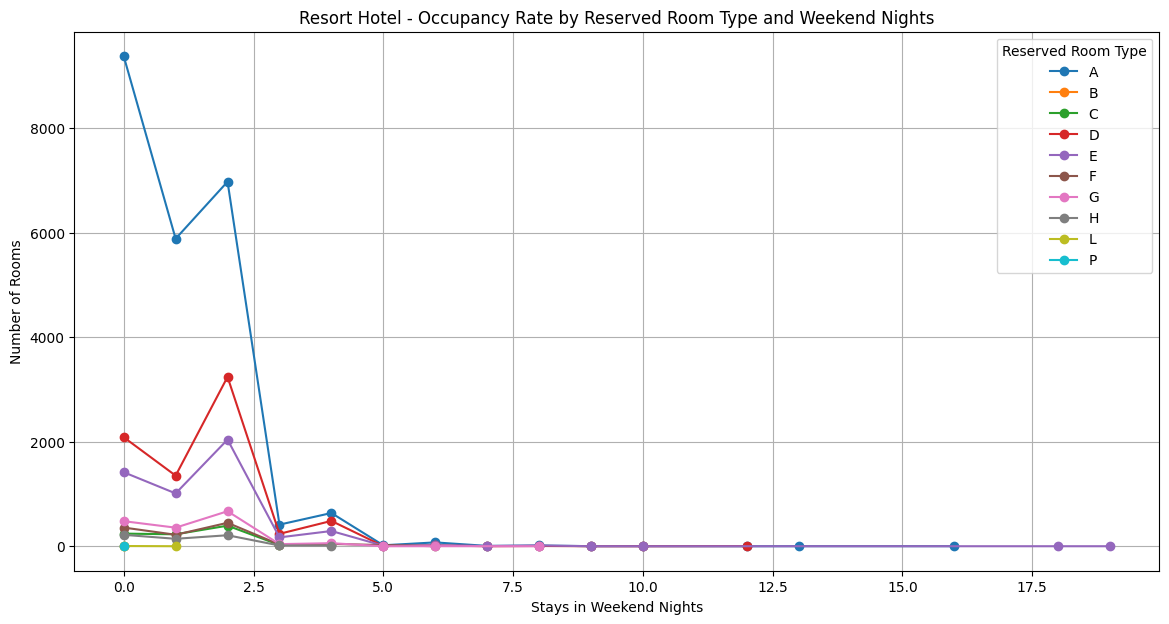

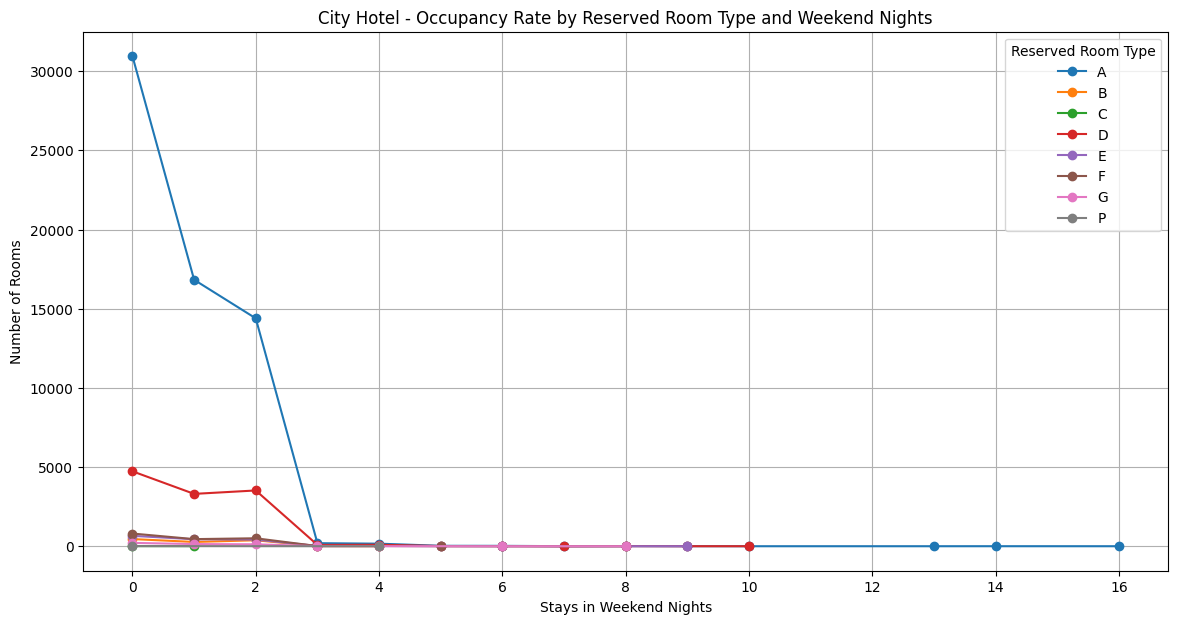

In [ ]:
# Fungsi untuk membuat visualisasi time series
def plot_time_series(data, title):
    plt.figure(figsize=(14, 7))
    for room_type in data['reserved_room_type'].unique():
        subset = data[data['reserved_room_type'] == room_type]
        plt.plot(subset['stays_in_weekend_nights'], subset['counts'], marker='o', label=f'{room_type}')
    plt.title(title)
    plt.xlabel('Stays in Weekend Nights')
    plt.ylabel('Number of Rooms')
    plt.legend(title='Reserved Room Type')
    plt.grid(True)
    plt.show()

# Visualisasi untuk Resort Hotel
plot_time_series(resort_counts, 'Resort Hotel - Occupancy Rate by Reserved Room Type and Weekend Nights')

# Visualisasi untuk City Hotel
plot_time_series(city_counts, 'City Hotel - Occupancy Rate by Reserved Room Type and Weekend Nights')


In [ ]:
# Fungsi untuk menghitung jumlah kamar
def calculate_room_counts(data, group_by_columns):
    return data.groupby(group_by_columns).size().reset_index(name='counts')

# Menghitung jumlah kamar untuk Resort Hotel
resort_counts = calculate_room_counts(resort_hotel_data, ['reserved_room_type', 'stays_in_week_nights'])

# Menghitung jumlah kamar untuk City Hotel
city_counts = calculate_room_counts(city_hotel_data, ['reserved_room_type', 'stays_in_week_nights'])


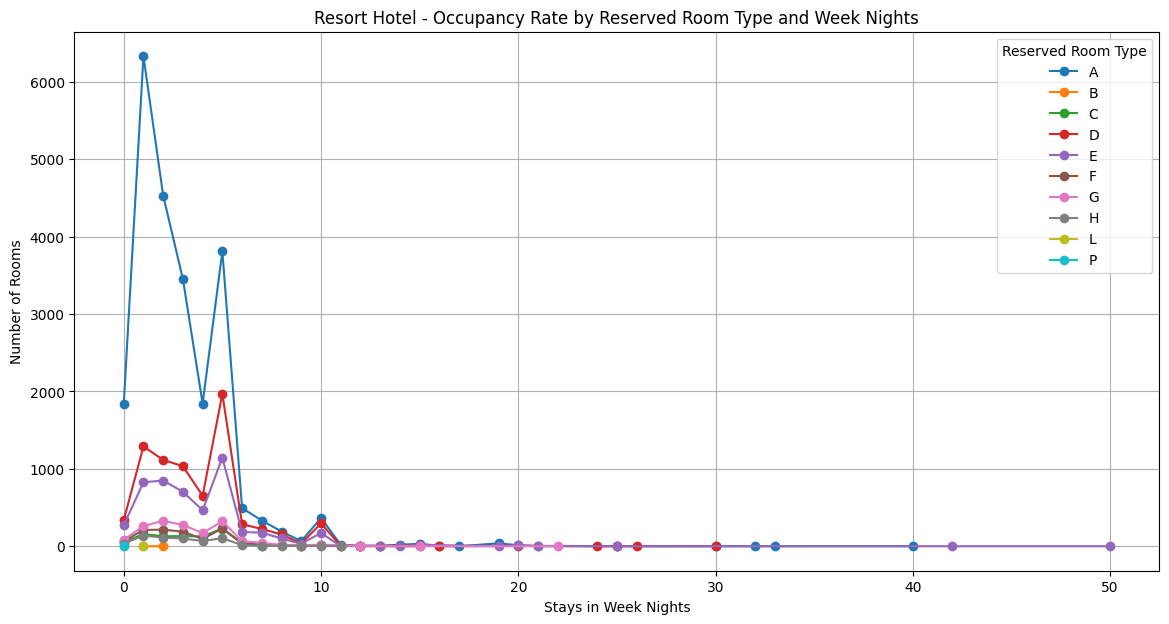

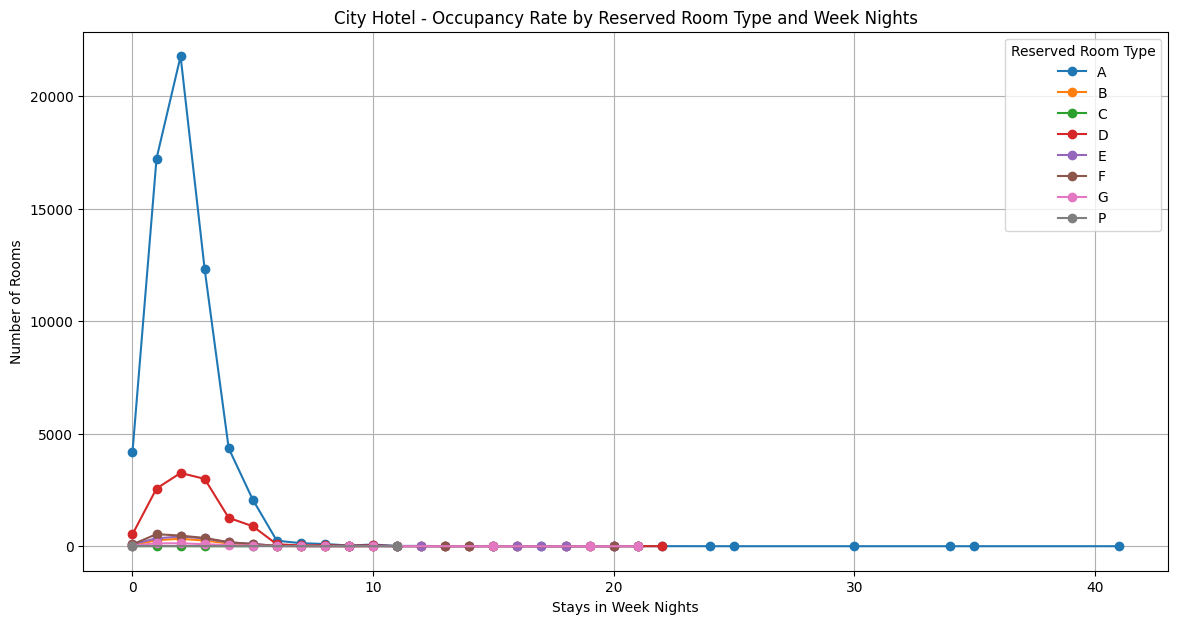

In [ ]:
# Fungsi untuk membuat visualisasi time series
def plot_time_series(data, title):
    plt.figure(figsize=(14, 7))
    for room_type in data['reserved_room_type'].unique():
        subset = data[data['reserved_room_type'] == room_type]
        plt.plot(subset['stays_in_week_nights'], subset['counts'], marker='o', label=f'{room_type}')
    plt.title(title)
    plt.xlabel('Stays in Week Nights')
    plt.ylabel('Number of Rooms')
    plt.legend(title='Reserved Room Type')
    plt.grid(True)
    plt.show()

# Visualisasi untuk Resort Hotel
plot_time_series(resort_counts, 'Resort Hotel - Occupancy Rate by Reserved Room Type and Week Nights')

# Visualisasi untuk City Hotel
plot_time_series(city_counts, 'City Hotel - Occupancy Rate by Reserved Room Type and Week Nights')


In [ ]:
# Fungsi untuk menghitung jumlah kamar
def calculate_room_counts(data, group_by_columns):
    return data.groupby(group_by_columns).size().reset_index(name='counts')

# Menghitung jumlah kamar untuk Resort Hotel
resort_counts = calculate_room_counts(resort_hotel_data, ['reserved_room_type', 'arrival_date_day_of_month'])

# Menghitung jumlah kamar untuk City Hotel
city_counts = calculate_room_counts(city_hotel_data, ['reserved_room_type', 'arrival_date_day_of_month'])


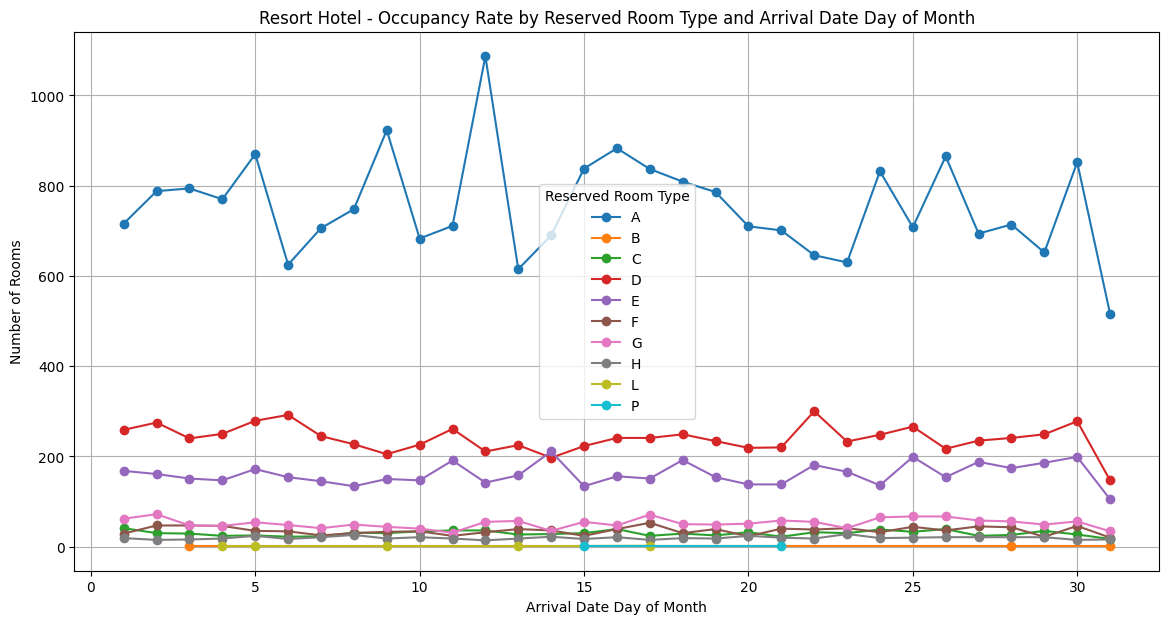

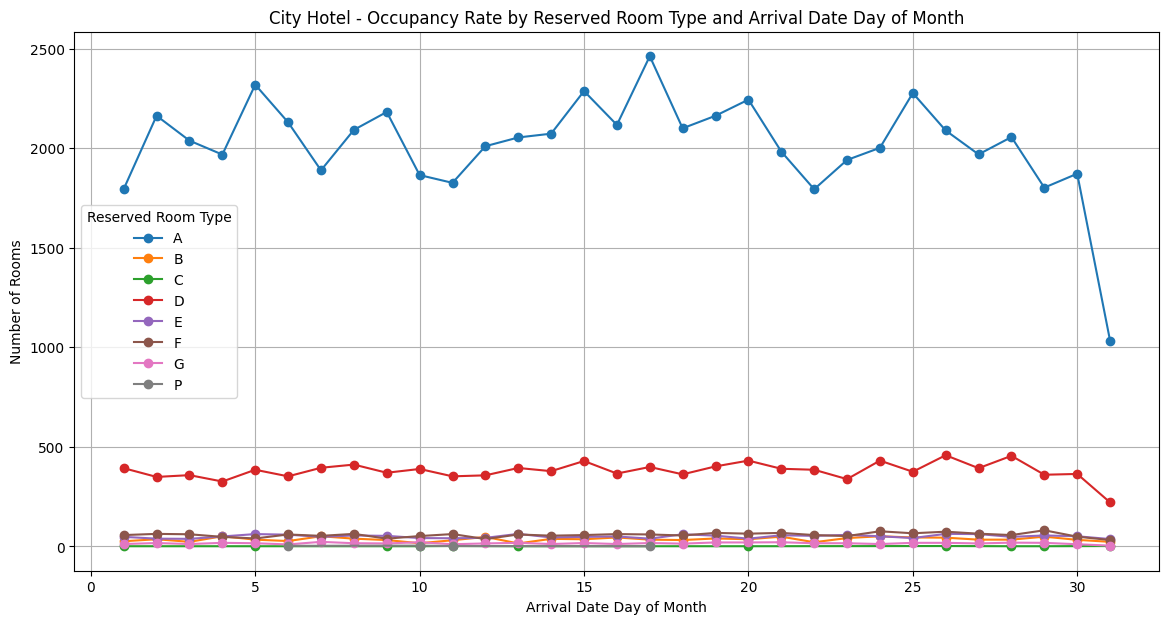

In [ ]:
# Fungsi untuk membuat visualisasi time series
def plot_time_series(data, title):
    plt.figure(figsize=(14, 7))
    for room_type in data['reserved_room_type'].unique():
        subset = data[data['reserved_room_type'] == room_type]
        plt.plot(subset['arrival_date_day_of_month'], subset['counts'], marker='o', label=f'{room_type}')
    plt.title(title)
    plt.xlabel('Arrival Date Day of Month')
    plt.ylabel('Number of Rooms')
    plt.legend(title='Reserved Room Type')
    plt.grid(True)
    plt.show()

# Visualisasi untuk Resort Hotel
plot_time_series(resort_counts, 'Resort Hotel - Occupancy Rate by Reserved Room Type and Arrival Date Day of Month')

# Visualisasi untuk City Hotel
plot_time_series(city_counts, 'City Hotel - Occupancy Rate by Reserved Room Type and Arrival Date Day of Month')


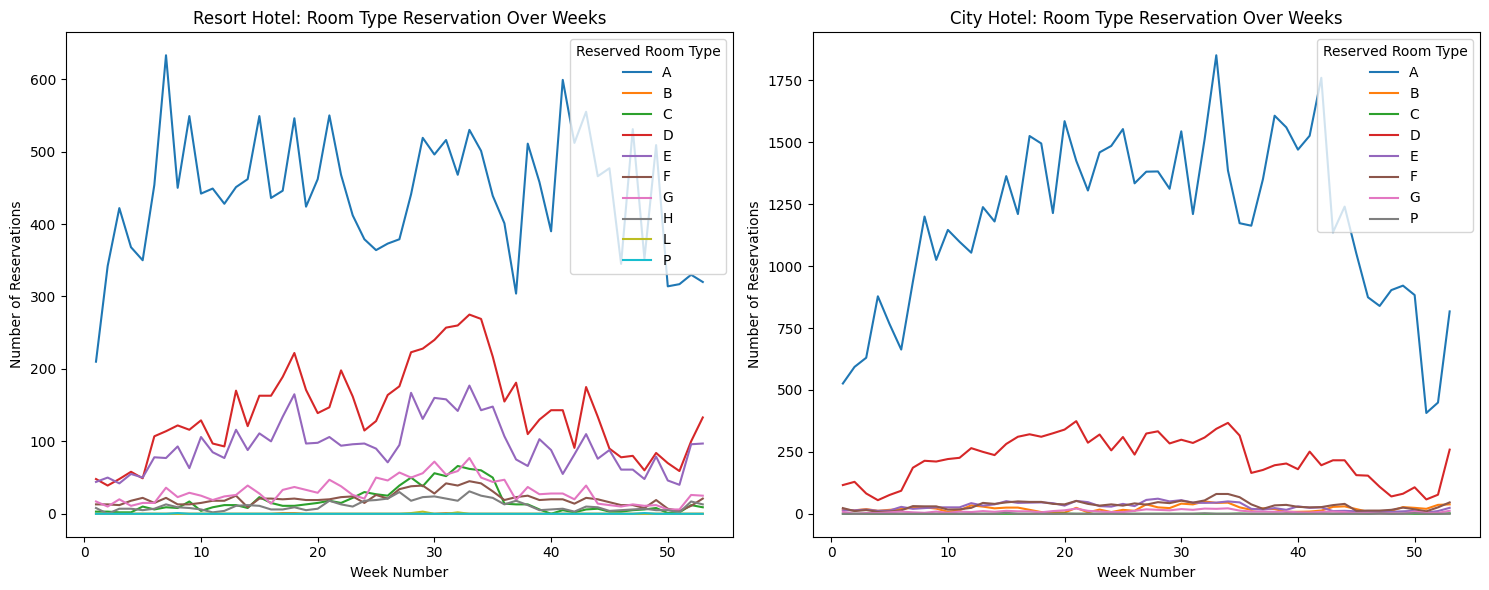

In [ ]:
# Menyatukan data berdasarkan 'arrival_date_week_number' dan 'reserved_room_type'
resort_hotel_agg = resort_hotel_data.groupby(['arrival_date_week_number', 'reserved_room_type']).size().unstack(fill_value=0)
city_hotel_agg = city_hotel_data.groupby(['arrival_date_week_number', 'reserved_room_type']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Room Type Reservation Over Weeks')
plt.xlabel('Week Number')
plt.ylabel('Number of Reservations')
plt.legend(title='Reserved Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Room Type Reservation Over Weeks')
plt.xlabel('Week Number')
plt.ylabel('Number of Reservations')
plt.legend(title='Reserved Room Type')

plt.tight_layout()
plt.show()

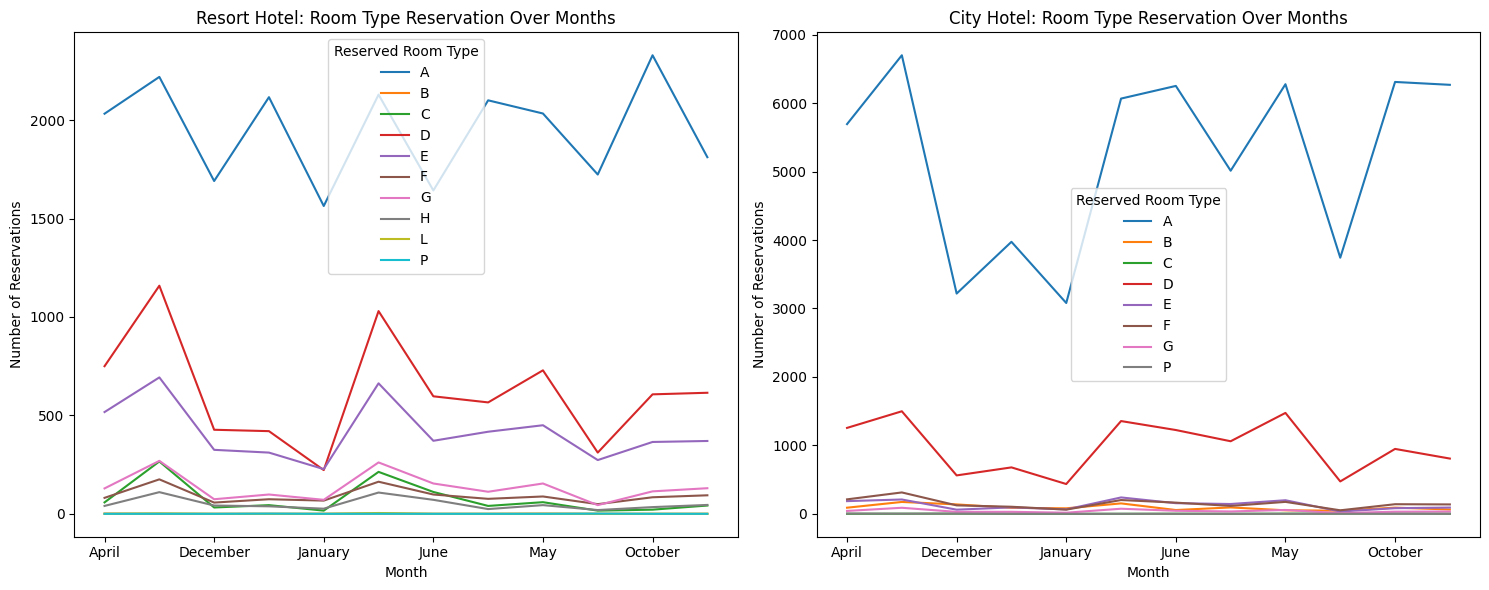

In [ ]:
resort_hotel_month_agg = resort_hotel_data.groupby(['arrival_date_month', 'reserved_room_type']).size().unstack(fill_value=0)
city_hotel_month_agg = city_hotel_data.groupby(['arrival_date_month', 'reserved_room_type']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_month_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Room Type Reservation Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(title='Reserved Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_month_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Room Type Reservation Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.legend(title='Reserved Room Type')

plt.tight_layout()
plt.show()


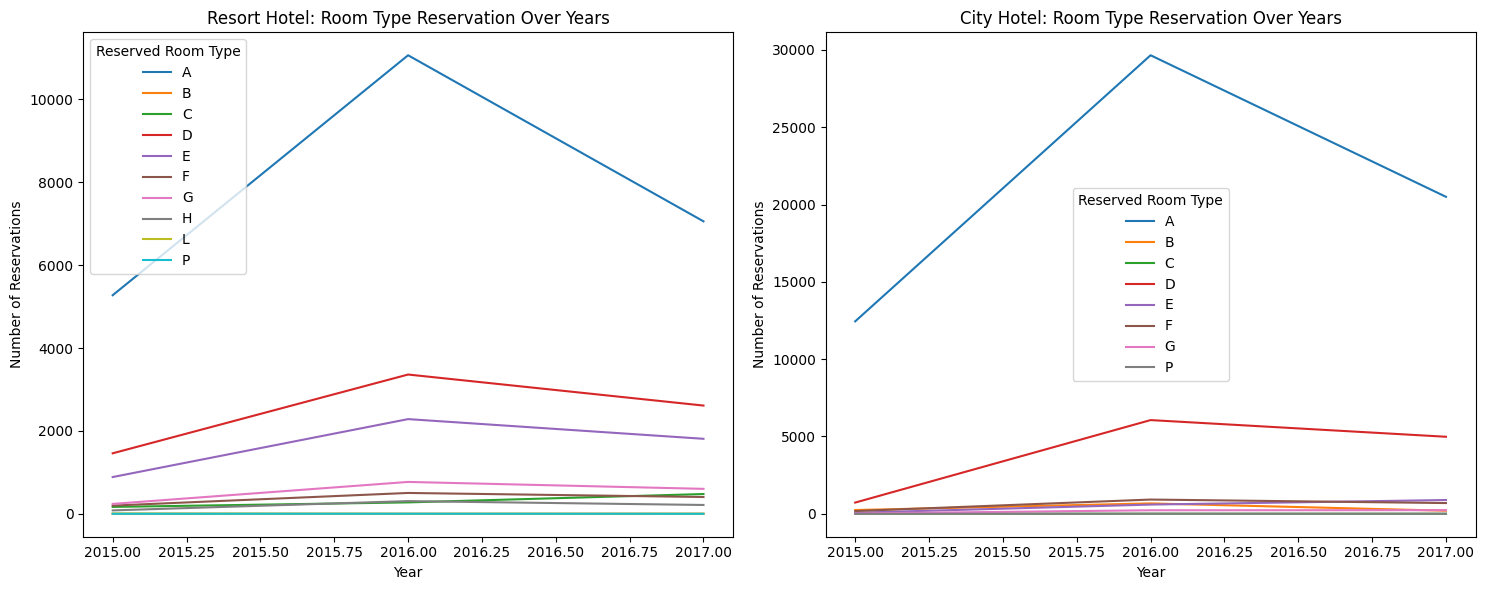

In [ ]:
resort_hotel_year_agg = resort_hotel_data.groupby(['arrival_date_year', 'reserved_room_type']).size().unstack(fill_value=0)
city_hotel_year_agg = city_hotel_data.groupby(['arrival_date_year', 'reserved_room_type']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_year_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Room Type Reservation Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reservations')
plt.legend(title='Reserved Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_year_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Room Type Reservation Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reservations')
plt.legend(title='Reserved Room Type')

plt.tight_layout()
plt.show()


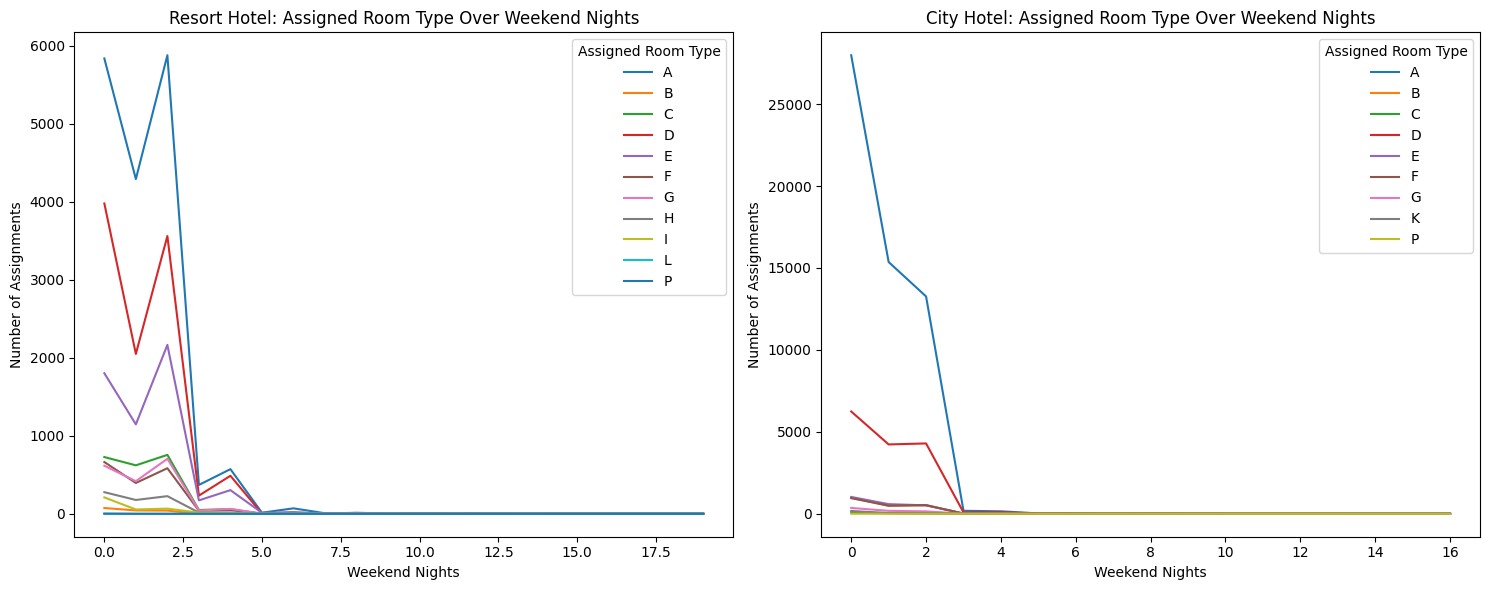

In [ ]:
resort_hotel_weekend_agg = resort_hotel_data.groupby(['stays_in_weekend_nights', 'assigned_room_type']).size().unstack(fill_value=0)
city_hotel_weekend_agg = city_hotel_data.groupby(['stays_in_weekend_nights', 'assigned_room_type']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_weekend_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Assigned Room Type Over Weekend Nights')
plt.xlabel('Weekend Nights')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_weekend_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Assigned Room Type Over Weekend Nights')
plt.xlabel('Weekend Nights')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

plt.tight_layout()
plt.show()


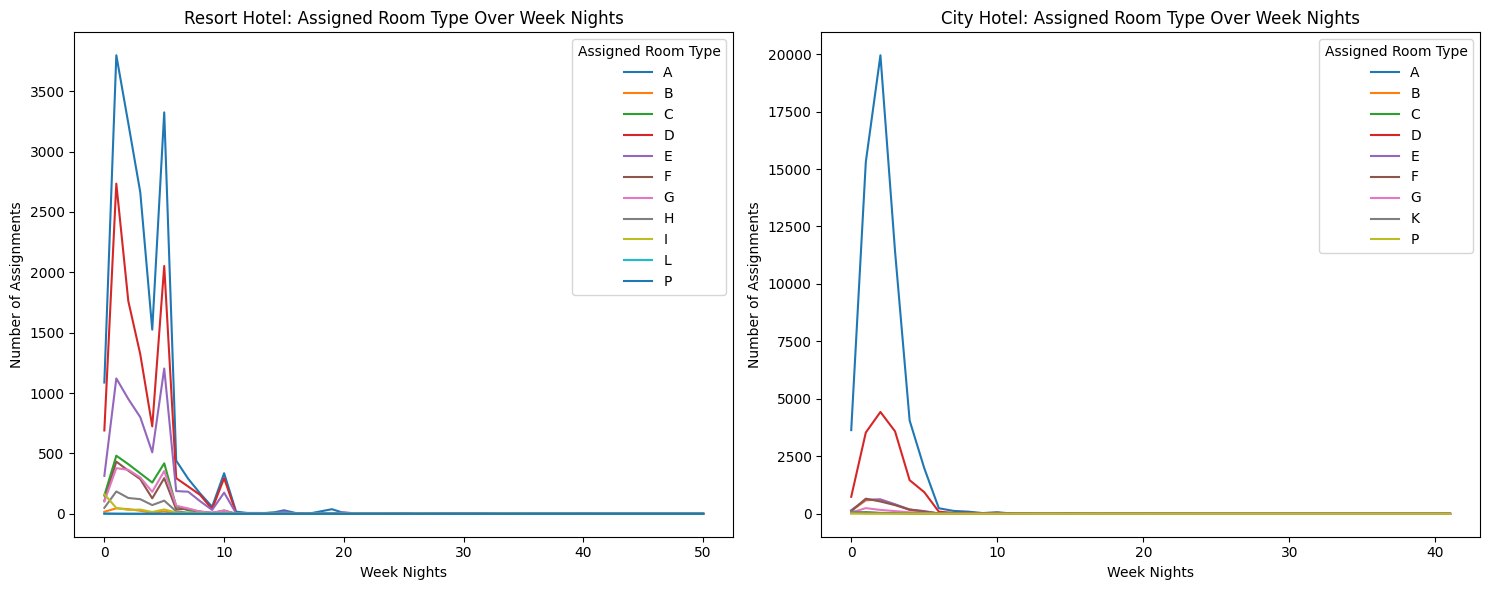

In [ ]:
resort_hotel_week_agg = resort_hotel_data.groupby(['stays_in_week_nights', 'assigned_room_type']).size().unstack(fill_value=0)
city_hotel_week_agg = city_hotel_data.groupby(['stays_in_week_nights', 'assigned_room_type']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_week_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Assigned Room Type Over Week Nights')
plt.xlabel('Week Nights')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_week_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Assigned Room Type Over Week Nights')
plt.xlabel('Week Nights')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

plt.tight_layout()
plt.show()


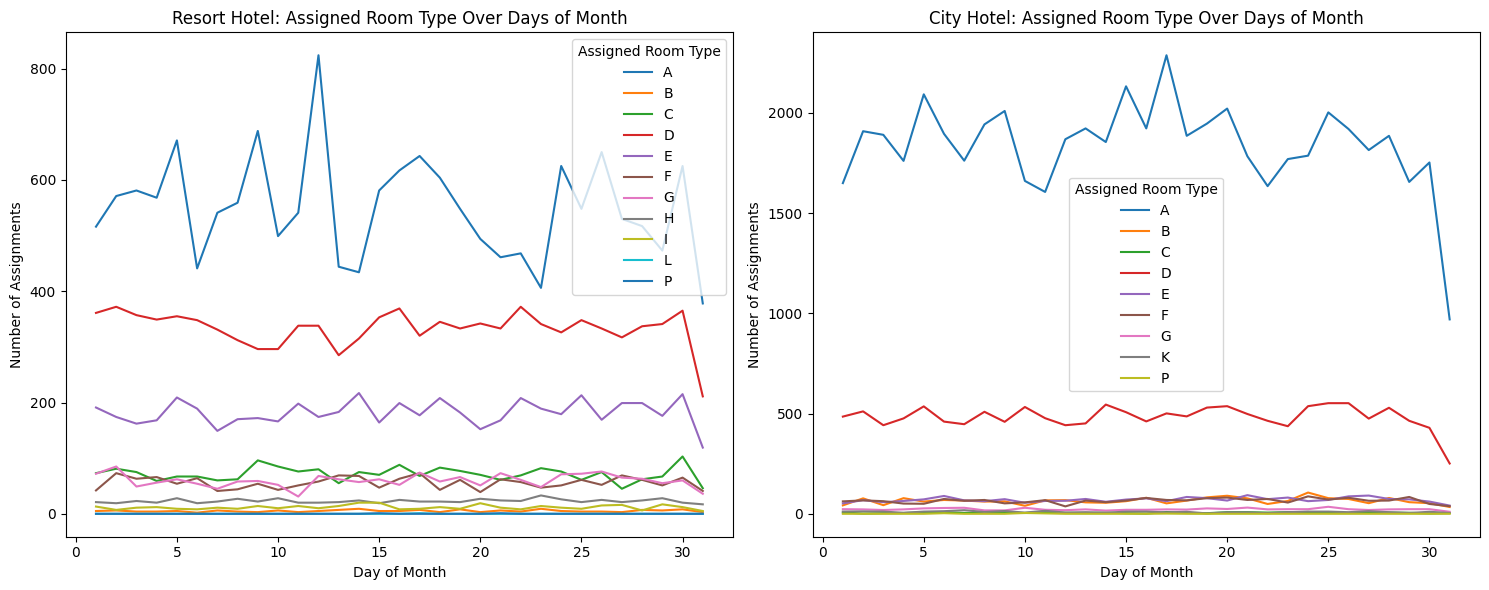

In [ ]:
resort_hotel_day_agg = resort_hotel_data.groupby(['arrival_date_day_of_month', 'assigned_room_type']).size().unstack(fill_value=0)
city_hotel_day_agg = city_hotel_data.groupby(['arrival_date_day_of_month', 'assigned_room_type']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_day_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Assigned Room Type Over Days of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_day_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Assigned Room Type Over Days of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

plt.tight_layout()
plt.show()


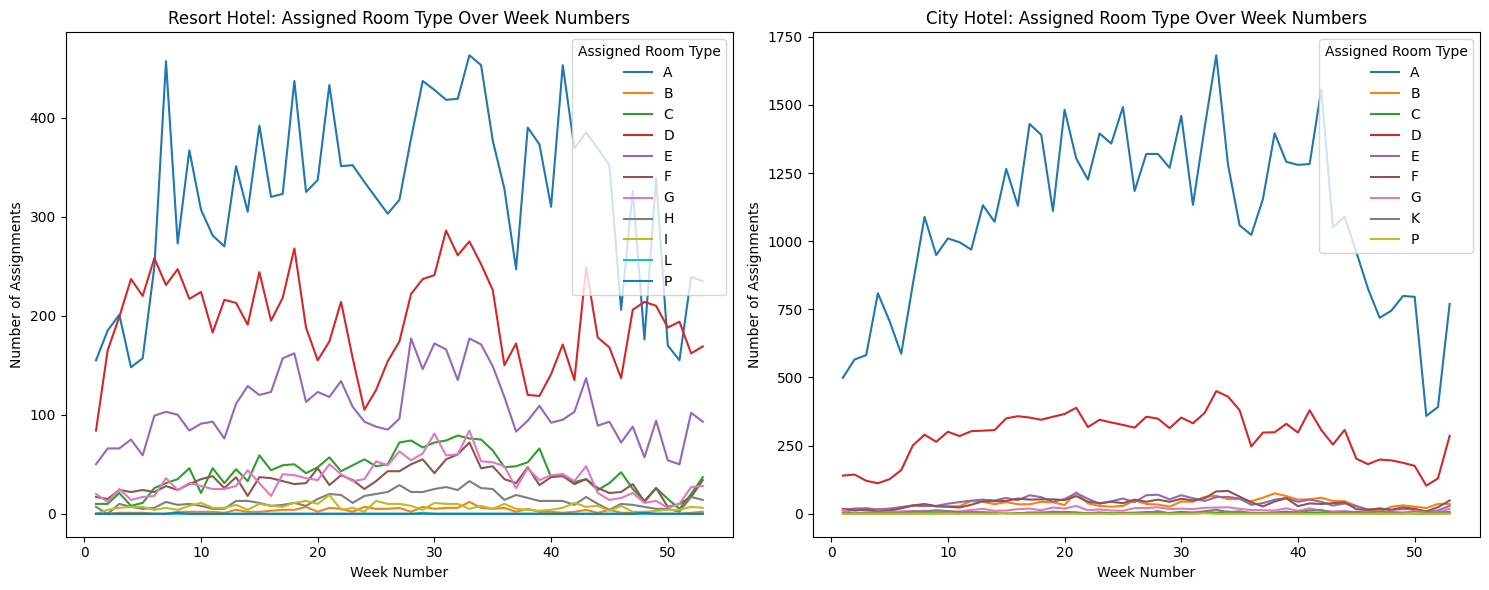

In [ ]:
resort_hotel_week_agg = resort_hotel_data.groupby(['arrival_date_week_number', 'assigned_room_type']).size().unstack(fill_value=0)
city_hotel_week_agg = city_hotel_data.groupby(['arrival_date_week_number', 'assigned_room_type']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_week_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Assigned Room Type Over Week Numbers')
plt.xlabel('Week Number')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_week_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Assigned Room Type Over Week Numbers')
plt.xlabel('Week Number')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

plt.tight_layout()
plt.show()


In [ ]:
hotel_data = pd.read_csv("hotel_booking.csv")

# Filter data untuk Resort Hotel dan City Hotel
resort_hotel_data = hotel_data[hotel_data['hotel'] == 'Resort Hotel']
city_hotel_data = hotel_data[hotel_data['hotel'] == 'City Hotel']


In [ ]:
# Mengubah arrival_date_month menjadi tipe kategori bulan secara berurutan
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel_data['arrival_date_month'] = pd.Categorical(hotel_data['arrival_date_month'], categories=months_order, ordered=True)

# Menyatukan data berdasarkan 'arrival_date_month'dan 'assigned_room_type'
resort_hotel_month_agg = resort_hotel_data.groupby(['arrival_date_month', 'assigned_room_type']).size().unstack(fill_value=0)
city_hotel_month_agg = city_hotel_data.groupby(['arrival_date_month', 'assigned_room_type']).size().unstack(fill_value=0)


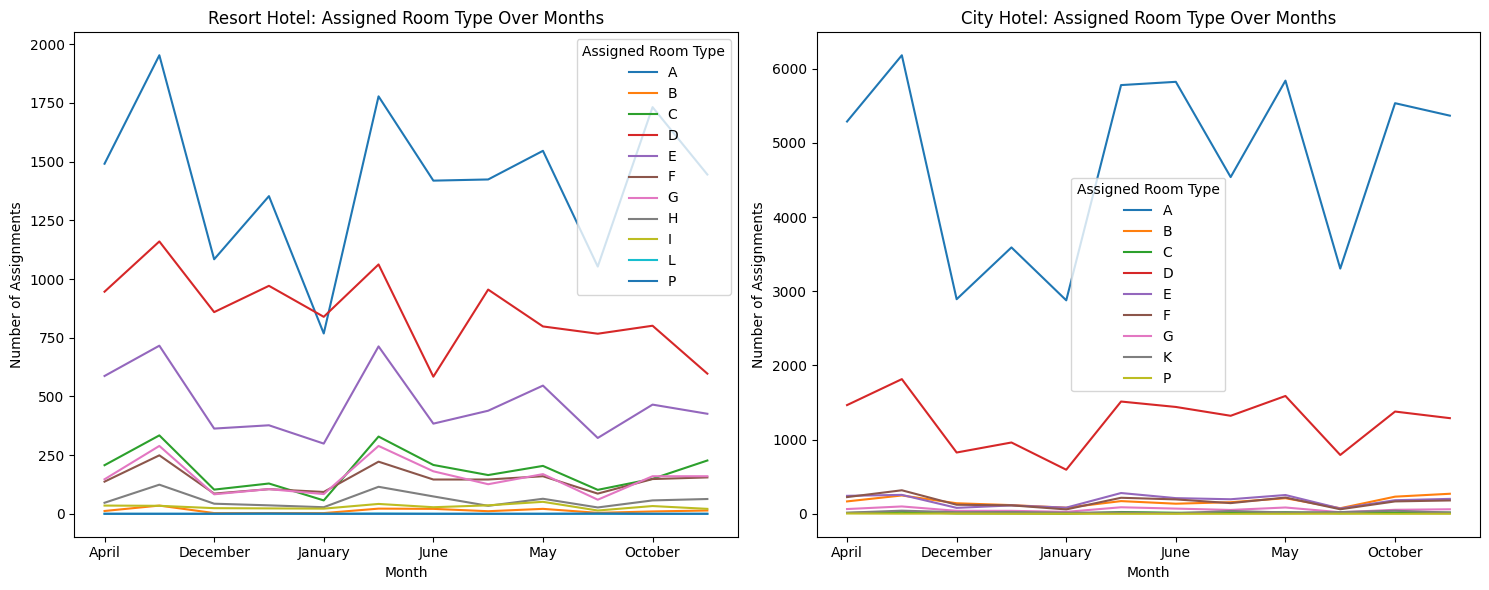

In [ ]:
# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_month_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Assigned Room Type Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_month_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Assigned Room Type Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

plt.tight_layout()
plt.show()


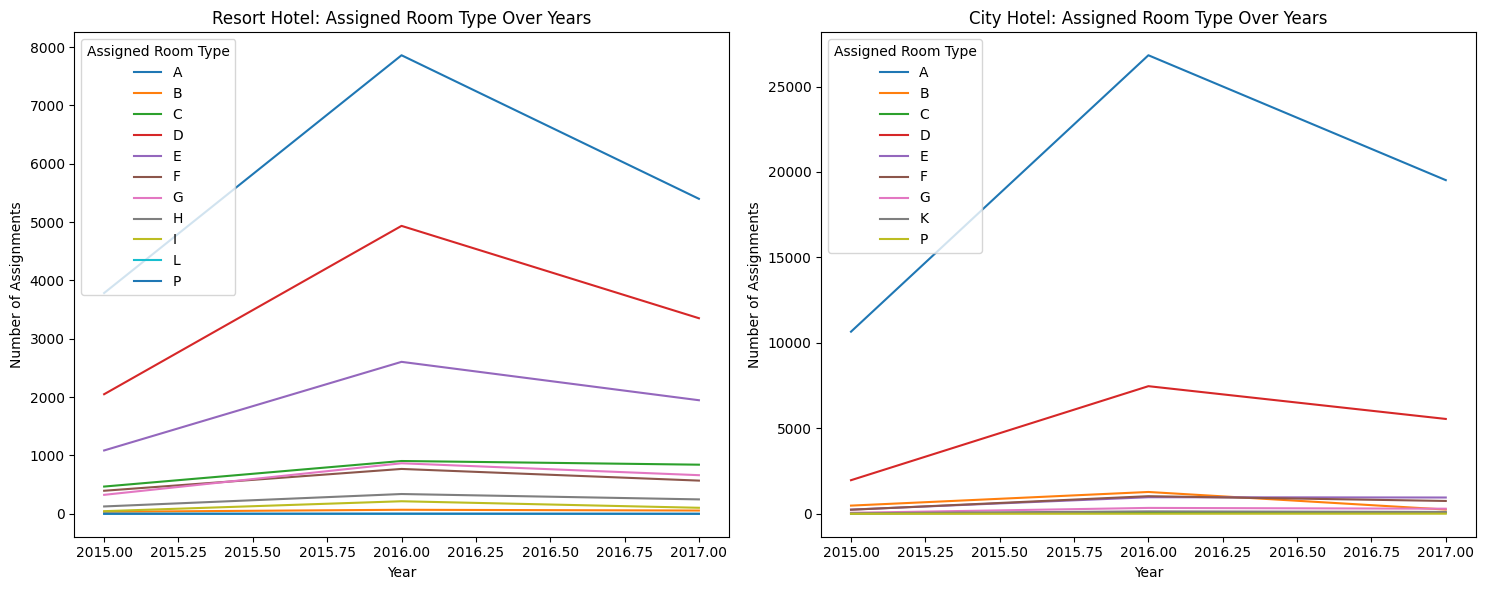

In [ ]:
resort_hotel_week_agg = resort_hotel_data.groupby(['arrival_date_year', 'assigned_room_type']).size().unstack(fill_value=0)
city_hotel_week_agg = city_hotel_data.groupby(['arrival_date_year', 'assigned_room_type']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 6))

# Plot for Resort Hotel
plt.subplot(1, 2, 1)
resort_hotel_week_agg.plot(kind='line', ax=plt.gca())
plt.title('Resort Hotel: Assigned Room Type Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

# Plot for City Hotel
plt.subplot(1, 2, 2)
city_hotel_week_agg.plot(kind='line', ax=plt.gca())
plt.title('City Hotel: Assigned Room Type Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Assignments')
plt.legend(title='Assigned Room Type')

plt.tight_layout()
plt.show()


**Visualisasi total_of_special_requests** **(dalam time series)**

Text(0, 0.5, 'Total Special Requests')

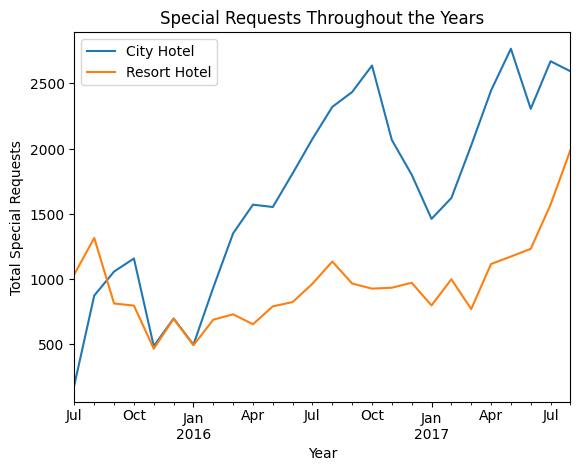

In [ ]:
# Ubah kolom arrival_date_month dan arrival_date_year menjadi datetime
df['date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + df['arrival_date_month'], format='%Y%B')

# Ubah kolom arrival_date_month dan arrival_date_year menjadi datetime
df['date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + df['arrival_date_month'], format='%Y%B')

# Kelompokkan data berdasarkan date dan hotel, hitung total_of_special_requests
grouped = df.groupby(['date', 'hotel'])['total_of_special_requests'].sum().reset_index()

# Pivot data sehingga hotel menjadi kolom
pivot_df = grouped.pivot(index='date', columns='hotel', values='total_of_special_requests')

# Plot data
ax = pivot_df.plot(kind='line')
ax.legend(["City Hotel", "Resort Hotel"])
plt.title('Special Requests Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Total Special Requests')

In [ ]:
# Buat kolom 'year_month' dengan menggabungkan tahun dan bulan
df['year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']

# Kelompokkan data berdasarkan year_month dan hotel, hitung total_of_special_requests
grouped = df.groupby(['year_month', 'hotel'])['total_of_special_requests'].sum().reset_index()

# Pivot data sehingga hotel menjadi kolom
pivot_df = grouped.pivot(index='year_month', columns='hotel', values='total_of_special_requests')

# Menampilkan tabel pivot
print(pivot_df)

hotel           City Hotel  Resort Hotel
year_month                              
2015-August            873          1315
2015-December          697           695
2015-July              189          1037
2015-November          485           465
2015-October          1157           796
2015-September        1057           812
2016-April            1570           653
2016-August           2320          1134
2016-December         1800           971
2016-February          934           688
2016-January           496           492
2016-July             2075           964
2016-June             1810           823
2016-March            1350           729
2016-May              1552           790
2016-November         2066           933
2016-October          2637           926
2016-September        2434           965
2017-April            2445          1115
2017-August           2593          1988
2017-February         1621           998
2017-January          1461           797
2017-July       